In [137]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, n_features=2, centers=3)
x_train, y_train = X[:-20], y[:-20]
x_test, y_test = X[-20:], y[-20:]

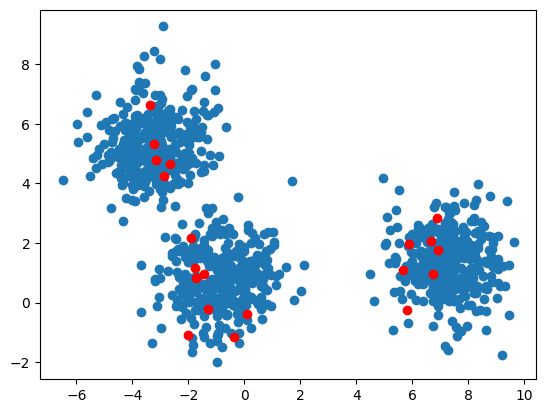

In [138]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.scatter(x_test[:, 0], x_test[:, 1], c="r")

In [139]:
def knn(x_train:np.array, y_train:np.array, x_test:np.array, y_test:np.array, k:int):
    if k > len(x_train) or k <= 0:
        raise ValueError("Invalid value for neighbors")
    if x_test.ndim == 1:
        x_test = x_test[np.newaxis, :]
    distances = np.sum((x_train[:, np.newaxis, :] - x_test[np.newaxis, :, :])**2, axis=2)
    nearest = np.argsort(distances.T, axis=1)[:, :5]
    indices = nearest.max(axis=1)
    return y_train[indices]


In [152]:
preds = knn(x_train, y_train, x_test, y_test, k=5)

In [153]:
(preds==y_test).mean()

np.float64(1.0)

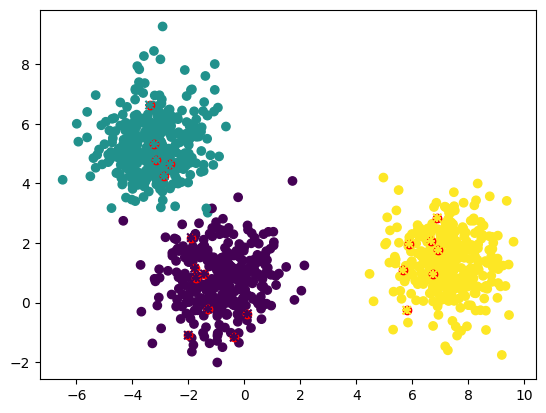

In [154]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], c="r")
plt.scatter(x_test[:, 0], x_test[:, 1], c=preds, marker="+")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker="x")